In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib

from utils.orb_paths import SetupPaths
import utils.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils.merger_trees import TraceMergerTree
from utils.readMergerHistoryFiles import FindHistory
from utils.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()


imported h5py...
modules seem to have loaded?


In [42]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":12,"ytick.labelsize":12})


## open the pairs catalog

In [2]:
f = h5py.File(f"../data/lowmass_z1.hdf5", 'r')
pairs = {}
print(f['Header'].attrs.keys())
for key, val in f.items():
    if key == "Header":
        continue
    pairs[key]=np.array(val)
    
f.close()
    

<KeysViewHDF5 ['Details', 'Redshift', 'Simulation', 'Snapshot']>


In [3]:
pair1 = pairs['Sub1 ID'][0]
pair2 = pairs['Sub2 ID'][0]
mass1 = pairs['Sub1 Mass'][0]
mass2 = pairs['Sub2 Mass'][0]

In [4]:
print(pair1, mass1, pair2, mass2)

296198 27.773279618611546 296197 27.253835434261802


## open the group catalog to pull out all of the subhalos in the group

In [5]:
catpath = paths.path_tnghydro
snap = 50
keysel_default =  [
            'GroupPos','Group_M_TopHat200', 
            'Group_R_TopHat200','GroupNsubs',
            'GroupFirstSub',
            'SubhaloGrNr','SubhaloMass',
            'SubhaloPos','SubhaloVel' ]
little_h = 0.6774

catalog = readSub.subfind_catalog(
            basedir=catpath,
            snapnum=snap,keysel=keysel_default)

In [6]:
group = catalog.SubhaloGrNr[pair1]
print(group)
print(catalog.GroupFirstSub[group])
print(catalog.Group_M_TopHat200[group])
print(catalog.GroupNsubs[group])

1561
296197
23.14462661743164
90


In [7]:
print(catalog.SubhaloMass[pair1]/little_h)
print(catalog.SubhaloMass[pair2]/little_h)

27.773279618611546
27.253835434261802


In [18]:
group_subids = np.where(catalog.SubhaloGrNr == group)[0]
group_subids = np.setdiff1d(group_subids,[296219,296246])

## Look at the merger trees of each of the subhalos

In [19]:
treedict = {}
for sub in group_subids:
    treedict[sub] = TraceMergerTree(snapshot=50,physics="hydro",sim="TNG",subfindID=sub)

In [22]:
treedict[group_subids[0]].mergedbranch.keys()

dict_keys(['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'S

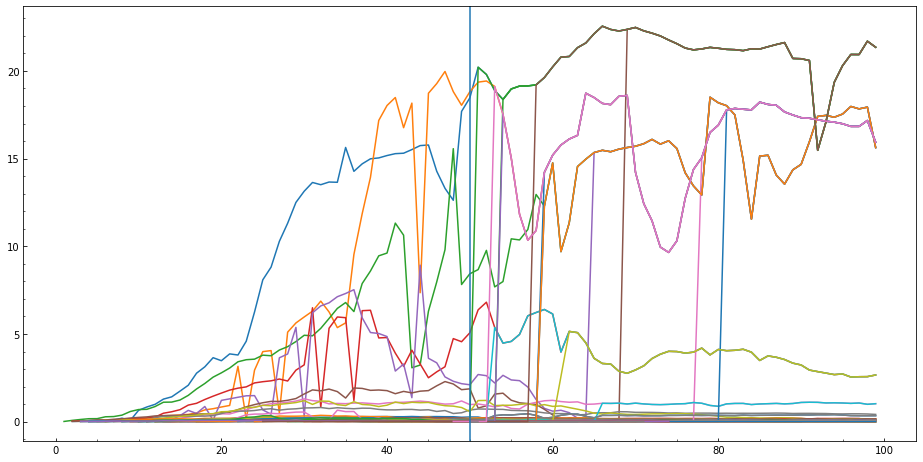

In [29]:
fig = plt.figure(figsize=(16,8))
for sub in group_subids:
    plt.plot(treedict[sub].mergedbranch['SnapNum'],treedict[sub].mergedbranch['SubhaloMass'],label=sub)
#     plt.plot(treedict[sub].mergedbranch['SnapNum'],treedict[sub].mergedbranch['Group_M_TopHat200'],label=sub)

#     plt.plot(tree2.mergedbranch['SnapNum'],tree2.mergedbranch['SubhaloMass'],'r',label='halo2')
# plt.plot(treedict[group_subids[0]].mergedbranch['SnapNum'][15:],treedict[group_subids[0]].mergedbranch['Group_M_TopHat200'][15:],label=sub,lw=4)
plt.axvline(50)
# plt.axvline(44)
# plt.axvline(treedict[group_subids[0]].mergedbranch['SnapNum'][38])

# plt.legend()
plt.show()

**five most massive at z = 1.5**


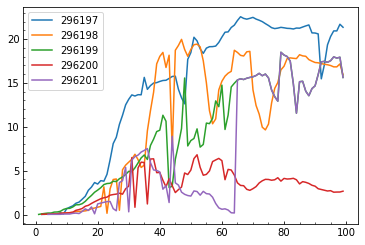

In [30]:
fig = plt.figure()
for sub in group_subids[0:5]:
    plt.plot(treedict[sub].mergedbranch['SnapNum'],treedict[sub].mergedbranch['SubhaloMass'],label=sub)

plt.legend()
plt.show()

## when is the most massive subhalo at z=1 the most massive at other snaps?

In [31]:
first = group_subids[0] 
first

296197

In [32]:
treedict[first].mergedbranch['SubfindID'] == treedict[first].mergedbranch['GroupFirstSub']

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True])

In [33]:
idz0 = treedict[first].mergedbranch['GroupFirstSub'][0] # the id of the group's largest subhalo at z=0
idz0

60731

## look at merger tree of that halo 

In [34]:
zerotree = TraceMergerTree(snapshot=99,physics="hydro",sim="TNG",subfindID=idz0)

In [35]:
zerotree.pastbranch.SubfindID[59]

14925

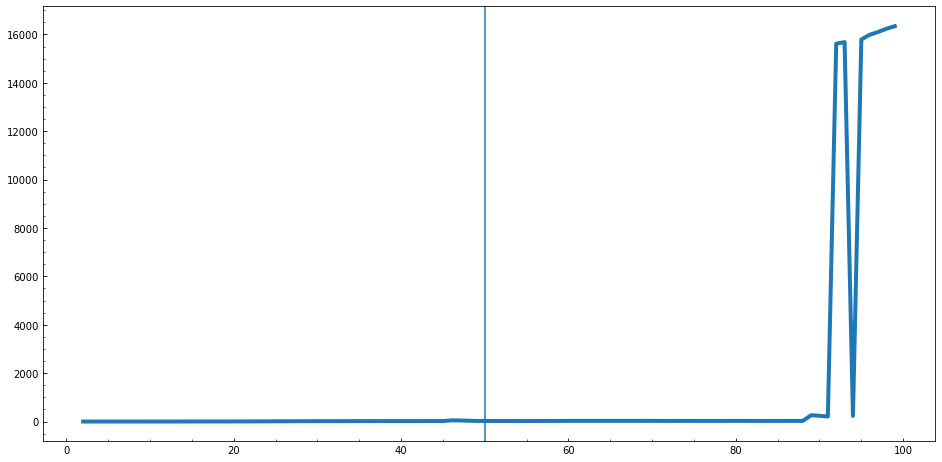

In [38]:
fig = plt.figure(figsize=(16,8))
# for sub in group_subids:
#     plt.plot(treedict[sub].mergedbranch['SnapNum'],treedict[sub].mergedbranch['SubhaloMass'],label=sub)
#     plt.plot(treedict[sub].mergedbranch['SnapNum'],treedict[sub].mergedbranch['Group_M_TopHat200'],label=sub)

#     plt.plot(tree2.mergedbranch['SnapNum'],tree2.mergedbranch['SubhaloMass'],'r',label='halo2')
plt.plot(treedict[group_subids[0]].mergedbranch['SnapNum'][0:],treedict[group_subids[0]].mergedbranch['Group_M_TopHat200'][0:],label=sub,lw=4)
plt.axvline(50)
# plt.axvline(44)
# plt.axvline(treedict[group_subids[0]].mergedbranch['SnapNum'][38])

# plt.legend()
plt.show()

# Looking at the first 16 pairs at z=1

In [40]:
tree1 = {}
tree2 = {}
for i in range(4):
    for j in range(4):
        ind =  i * 4 + j

        tree1[ind] = TraceMergerTree(snapshot=50,physics="hydro",sim="TNG",subfindID=pairs['Sub1 ID'][ind])
        tree2[ind] = TraceMergerTree(snapshot=50,physics="hydro",sim="TNG",subfindID=pairs['Sub2 ID'][ind])

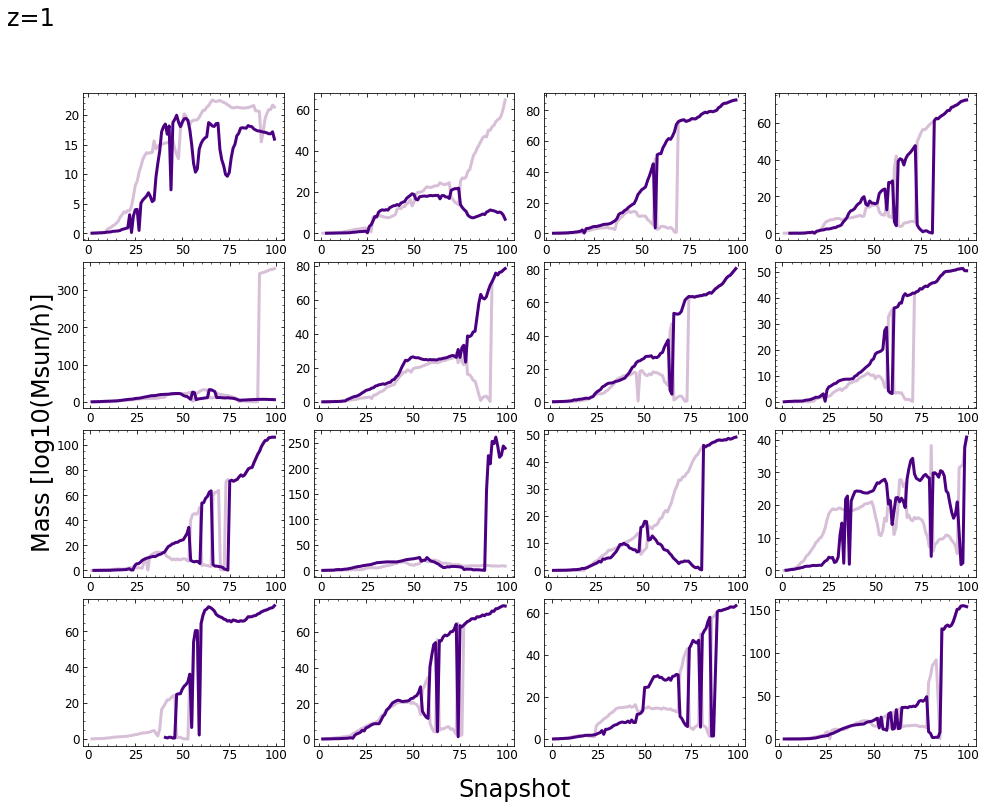

In [43]:
# make a bunch of the plots and see if they all look the same! 
fig,ax = plt.subplots(4,4,figsize=(16,12), sharey=False, sharex=False, gridspec_kw={'width_ratios': [1,1,1,1], 'height_ratios':[1,1,1,1],'wspace': 0.15,"hspace":0.15})

for i in range(4):
    for j in range(4):
        ind =  i * 4 + j
        
        ax[i][j].plot(tree2[ind].mergedbranch['SnapNum'],tree2[ind].mergedbranch['SubhaloMass'],color="thistle",label='halo2',lw=3)
        ax[i][j].plot(tree1[ind].mergedbranch['SnapNum'],tree1[ind].mergedbranch['SubhaloMass'],color='indigo',label='halo1',lw=3)
        

fig.supxlabel("Snapshot",y=0.06)
fig.supylabel("Mass [log10(Msun/h)]",x=0.08)
fig.suptitle("z=1",x=0.08)
plt.show()


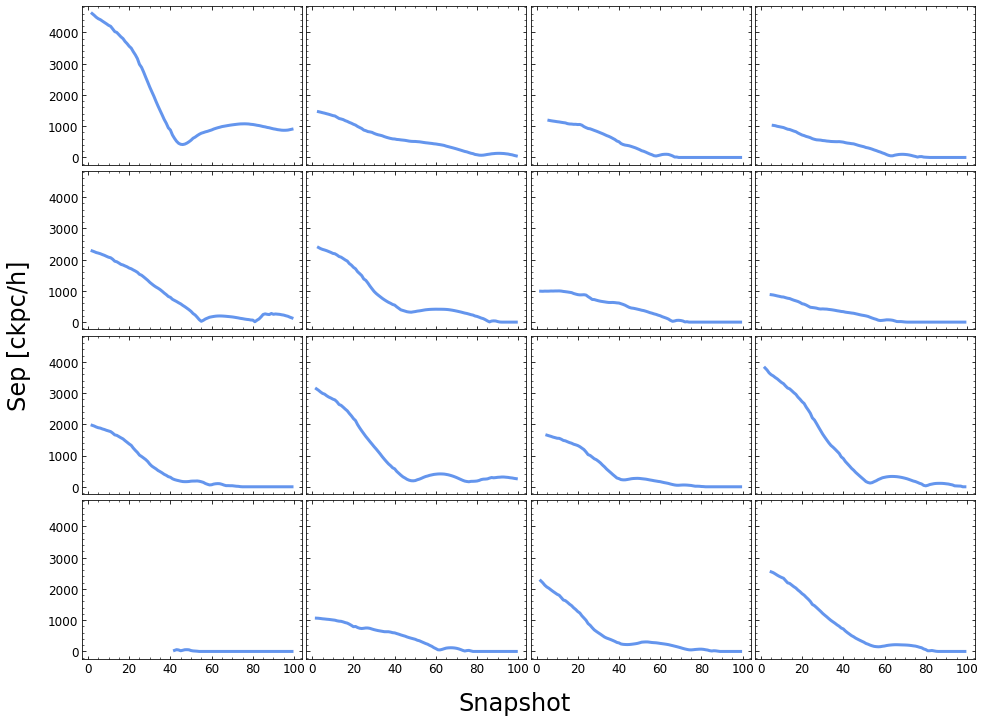

In [44]:
# make a bunch of the plots and see if they all look the same! 
fig,ax = plt.subplots(4,4,figsize=(16,12), sharey=True, sharex=True, gridspec_kw={'width_ratios': [1,1,1,1], 'height_ratios':[1,1,1,1],'wspace': 0.02,"hspace":0.04})

for i in range(4):
    for j in range(4):
        ind =  i * 4 + j
        
        sub1 = tree1[ind].mergedbranch
        sub2 = tree2[ind].mergedbranch
        
        snap1 = sub1['SnapNum']
        snap2 = sub2['SnapNum']

        mask1 = np.isin(snap1,snap2)
        mask2 = np.isin(snap2,snap1)
        
        pos1 = sub1['SubhaloPos'][mask1]
        pos2 = sub2['SubhaloPos'][mask2]
        dists = np.linalg.norm(vector(pos1,pos2,75000),axis=1)
        
        ax[i][j].plot(sub1['SnapNum'][mask1],dists,color='cornflowerblue',label=ind,lw=3)
#         ax[i][j].legend()
#         ax[i][j].plot(tree2[ind].mergedbranch['SnapNum'],tree2[ind].mergedbranch['SubhaloMass'],'r',label='halo2')

# ax[0][0].set_frame_on
fig.supxlabel("Snapshot",y=0.06)
fig.supylabel("Sep [ckpc/h]",x=0.06)
plt.show()


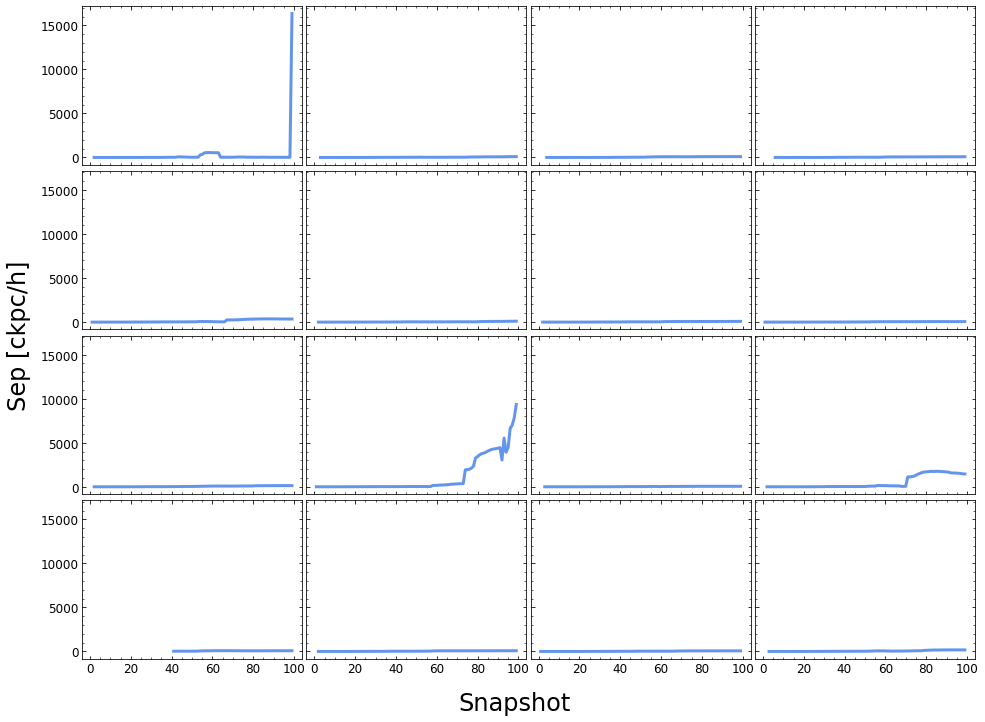

In [46]:
# make a bunch of the plots and see if they all look the same! 
fig,ax = plt.subplots(4,4,figsize=(16,12), sharey=True, sharex=True, gridspec_kw={'width_ratios': [1,1,1,1], 'height_ratios':[1,1,1,1],'wspace': 0.02,"hspace":0.04})

for i in range(4):
    for j in range(4):
        ind =  i * 4 + j
        
        sub1 = tree1[ind].mergedbranch
        
        ax[i][j].plot(sub1['SnapNum'],sub1['Group_M_TopHat200'],color='cornflowerblue',label=ind,lw=3)
#         ax[i][j].legend()
#         ax[i][j].plot(tree2[ind].mergedbranch['SnapNum'],tree2[ind].mergedbranch['SubhaloMass'],'r',label='halo2')

# ax[0][0].set_frame_on
fig.supxlabel("Snapshot",y=0.06)
fig.supylabel("Sep [ckpc/h]",x=0.06)
plt.show()
